In [19]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from palmerpenguins import load_penguins
from sklearn.preprocessing import PolynomialFeatures

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [20]:
# Code Here
penguins = load_penguins()
print(penguins.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  


In [21]:
categorical_cols = penguins.select_dtypes(include=["object", "category"]).columns.tolist()
print(categorical_cols)


['species', 'island', 'sex']


In [22]:
numeric_cols = penguins.select_dtypes(include=["number"]).columns.tolist()
print(numeric_cols)

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year']


In [23]:
penguins_dummy = pd.get_dummies(penguins)
penguins_dummy

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,2007,True,False,False,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,2007,True,False,False,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,2007,True,False,False,False,False,True,True,False
3,NaN,NaN,NaN,NaN,2007,True,False,False,False,False,True,False,False
4,36.7,19.3,193.0,3450.0,2007,True,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009,False,True,False,False,True,False,False,True
340,43.5,18.1,202.0,3400.0,2009,False,True,False,False,True,False,True,False
341,49.6,18.2,193.0,3775.0,2009,False,True,False,False,True,False,False,True
342,50.8,19.0,210.0,4100.0,2009,False,True,False,False,True,False,False,True


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [24]:
penguins_dummy = penguins_dummy.dropna()

In [25]:
X = penguins_dummy.drop(columns=['bill_depth_mm'])
y = penguins_dummy['bill_depth_mm']

print(X)
print(y)



     bill_length_mm  flipper_length_mm  body_mass_g  year  species_Adelie  \
0              39.1              181.0       3750.0  2007            True   
1              39.5              186.0       3800.0  2007            True   
2              40.3              195.0       3250.0  2007            True   
4              36.7              193.0       3450.0  2007            True   
5              39.3              190.0       3650.0  2007            True   
..              ...                ...          ...   ...             ...   
339            55.8              207.0       4000.0  2009           False   
340            43.5              202.0       3400.0  2009           False   
341            49.6              193.0       3775.0  2009           False   
342            50.8              210.0       4100.0  2009           False   
343            50.2              198.0       3775.0  2009           False   

     species_Chinstrap  species_Gentoo  island_Biscoe  island_Dream  \
0   

In [26]:
# --- Split into train and test ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Define and fit multiple models ---
models = {}
train_results = []

In [27]:
# Model 1: simple linear regression on all numeric predictors (no polynomial)
models["Linear_All"] =LinearRegression().fit(X_train, y_train)

In [28]:
# Model 2: linear model using only bill_length_mm and flipper_length_mm
cols2 = [c for c in X_train.columns if "bill_length_mm" in c or "flipper_length_mm" in c]
models["Linear_Subset"] = LinearRegression().fit(X_train[cols2], y_train)


In [29]:
# Model 3: polynomial model (degree 2) on numeric features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
models["Poly_Degree2"] = LinearRegression().fit(X_poly_train, y_train)


In [30]:
# Model 4: linear model excluding body_mass_g
cols4 = [c for c in X_train.columns if "body_mass_g" not in c]
models["No_BodyMass"] = LinearRegression().fit(X_train[cols4], y_train)

In [31]:
print(models)

{'Linear_All': LinearRegression(), 'Linear_Subset': LinearRegression(), 'Poly_Degree2': LinearRegression(), 'No_BodyMass': LinearRegression()}


In [32]:
records = []


In [33]:
# Test
for name, m in models.items():
    if name == "Poly_Degree2":
        y_pred = m.predict(X_poly_test)
    elif name == "Linear_Subset":
        y_pred = m.predict(X_test[cols2])
    elif name == "No_BodyMass":
        y_pred = m.predict(X_test[cols4])
    else:
        y_pred = m.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    records.append({
        "Model": name, "Split": "Test",
        "RMSE": np.sqrt(mse), "MSE": mse, "R2": r2_score(y_test, y_pred)
    })

In [34]:
# Train
for name, m in models.items():
    if name == "Poly_Degree2":
        y_pred = m.predict(X_poly_train)
    elif name == "Linear_Subset":
        y_pred = m.predict(X_train[cols2])
    elif name == "No_BodyMass":
        y_pred = m.predict(X_train[cols4])
    else:
        y_pred = m.predict(X_train)

    mse = mean_squared_error(y_train, y_pred)
    records.append({
        "Model": name, "Split": "Train",
        "RMSE": np.sqrt(mse), "MSE": mse, "R2": r2_score(y_train, y_pred)
    })

In [35]:
results_df = (pd.DataFrame(records)
              .sort_values(["Model","Split"])
              .reset_index(drop=True))

results_df

,Model,Split,RMSE,MSE,R2
0,Linear_All,Test,0.749885,0.562327,0.864551
1,Linear_All,Train,0.785860,0.617576,0.838125
2,Linear_Subset,Test,1.552386,2.409902,0.419523
3,Linear_Subset,Train,1.554783,2.417349,0.366381
4,No_BodyMass,Test,0.763177,0.582439,0.859707
5,No_BodyMass,Train,0.798816,0.638107,0.832744
6,Poly_Degree2,Test,7.493606,56.154136,-12.525949
7,Poly_Degree2,Train,0.672632,0.452433,0.881411


Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [36]:
# Order models in a sensible, readable way
model_order = ["Linear_Subset", "No_BodyMass", "Linear_All", "Poly_Degree2"]
results_df["Model"] = pd.Categorical(results_df["Model"], categories=model_order, ordered=True)
results_df = results_df.sort_values(["Model","Split"]).reset_index(drop=True)


In [37]:
# Round numeric metrics for readability
results_df[["RMSE","MSE","R2"]] = results_df[["RMSE","MSE","R2"]].round(3)

# Wider, nicely labeled table
pretty_cols = {
    "Model": "Model",
    "Split": "Data Split",
    "RMSE": "RMSE (bill_depth_mm)",
    "MSE": "MSE",
    "R2": "R²"
}

clean_results = results_df.rename(columns=pretty_cols)
print("\nClean Results:")
print(clean_results.to_string(index=False))



Clean Results:
        Model Data Split  RMSE (bill_depth_mm)    MSE      R²
Linear_Subset       Test                 1.552  2.410   0.420
Linear_Subset      Train                 1.555  2.417   0.366
  No_BodyMass       Test                 0.763  0.582   0.860
  No_BodyMass      Train                 0.799  0.638   0.833
   Linear_All       Test                 0.750  0.562   0.865
   Linear_All      Train                 0.786  0.618   0.838
 Poly_Degree2       Test                 7.494 56.154 -12.526
 Poly_Degree2      Train                 0.673  0.452   0.881


In [40]:
from plotnine import ggplot, aes, geom_bar, position_dodge, labs, theme_bw, theme, element_text


In [41]:
# Melt (tidy) results for Train/Test RMSE comparison
plot_data = results_df[["Model", "Split", "RMSE"]].copy()
plot_data["Split"] = plot_data["Split"].replace({"Train": "Train RMSE", "Test": "Test RMSE"})


In [42]:
p = (
    ggplot(plot_data, aes(x="Model", y="RMSE", fill="Split"))
    + geom_bar(stat="identity", position=position_dodge(width=0.8))
    + labs(
        title="Training vs Test RMSE by Model",
        x="Model",
        y="RMSE (bill_depth_mm)",
        fill="Data Split"
    )
    + theme_bw()
    + theme(
        axis_text_x=element_text(rotation=15, ha="right", size=10),
        axis_title_x=element_text(size=12),
        axis_title_y=element_text(size=12),
        plot_title=element_text(size=14, weight="bold", ha="center")
    )
)

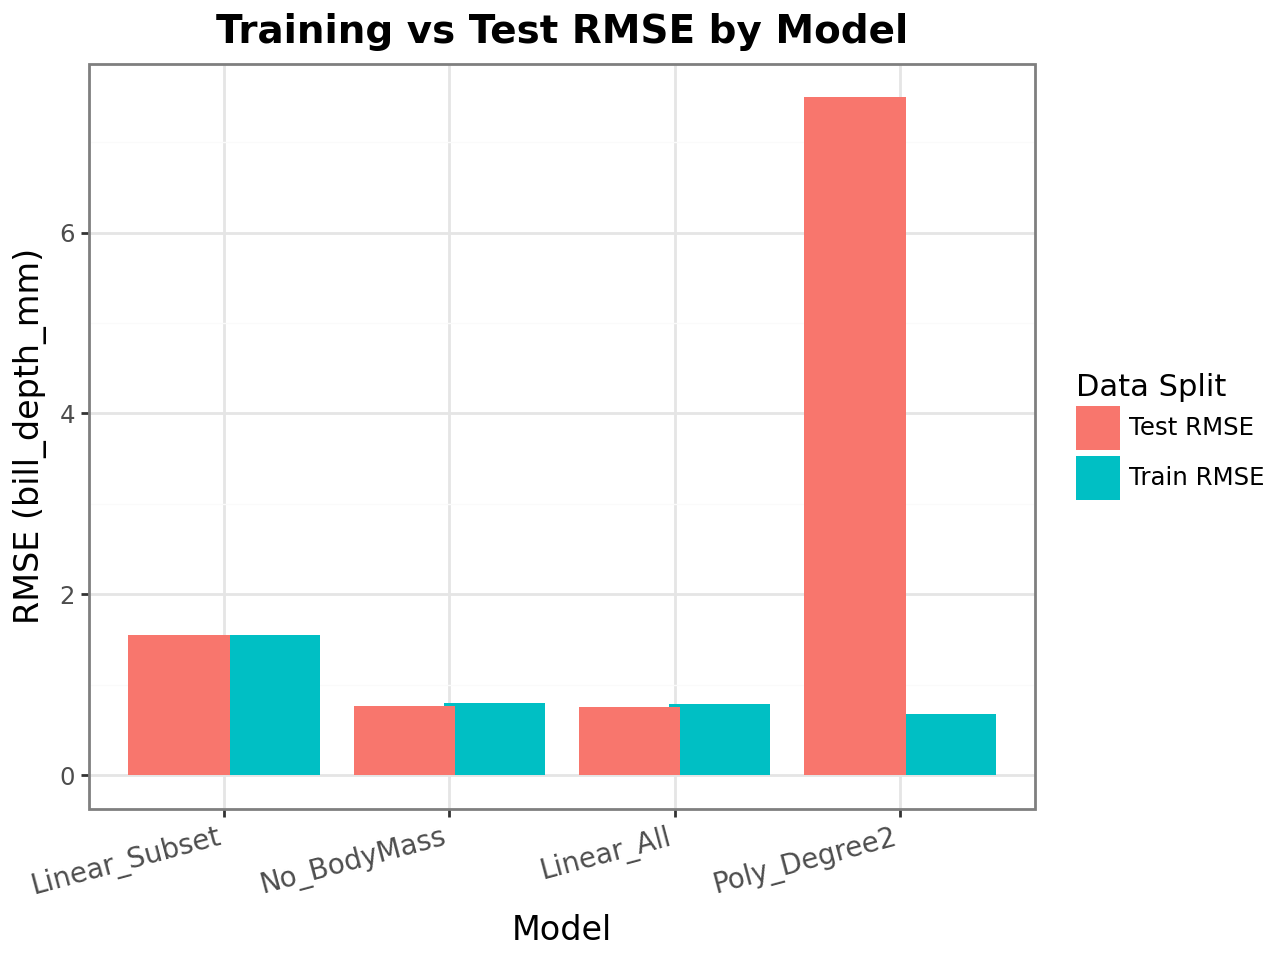

In [43]:
p.show()